## How do we load mp3?

sudo apt-get install libsndfile1

pip install soundfile

sudo apt-get install libav-tools

In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [2]:
path = os.getcwd()
command = [
    'avconv',
    '-i', os.path.join(path, 'welcome.mp3'),
    '-f', 's16le',
    '-acodec', 'pcm_s16le',
    '-ar', '44100', # ouput will have 44100 Hz
    '-ac', '2', # stereo (set to '1' for mono)
    '-'
]

pipe = subprocess.Popen(command, 
                        stdout=subprocess.PIPE, 
                        bufsize=10**8)
stdoutdata = pipe.stdout.read()
audio_array = np.fromstring(stdoutdata, dtype="int16")

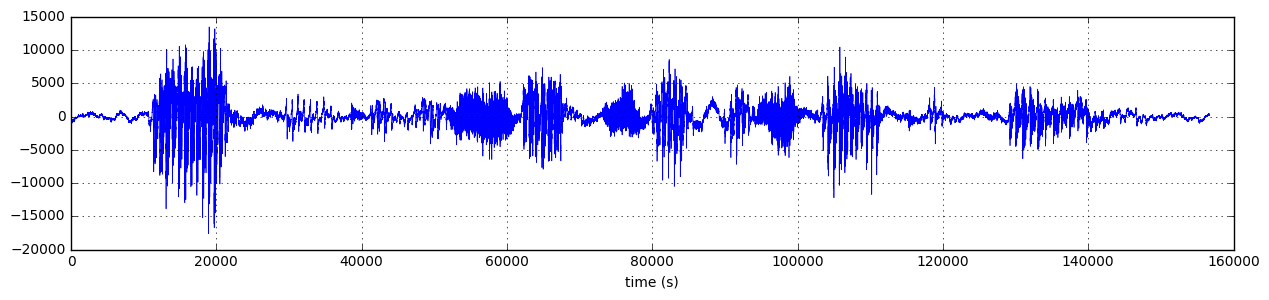

In [3]:
plt.figure(figsize=(15,3))
plt.plot(audio_array, lw=0.5); plt.xlabel('time (s)'); plt.grid()
plt.show()

In [4]:
audio_array.shape

(156672,)

## Now do it straight into python

In [9]:
sd.play(audio_array, 44100)
sd.wait()
sd.play(audio_array, 88200)
sd.wait()
sd.play(audio_array, 130000)
sd.wait()

In [13]:
duration = 2.5  # seconds
fs = 44100
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
sd.wait()

In [14]:
sd.play(myrecording, fs)
sd.wait()